In [7]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import ImageNet

import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

import os
import time
from utils import AddGaussianNoise, AddSaltPepperNoise, AllShuffle
from utils import PhaseShuffle, MagShuffle
from timm.models import efficientnet_b0
from peff_b0 import PEffN_b0SeparateHP_V1

In [2]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn_vision/'
data_root = '/mnt/smb/locker/abbott-locker/hcnn_vision/imagenet/'

# Clean images

In [46]:
clean_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [47]:
train_subset_indices = np.arange(4, 25)
train_ds = ImageNet(data_root, split='val', transform=clean_transform)
train_subset = torch.utils.data.Subset(train_ds, train_subset_indices)

In [48]:
loader = torch.utils.data.DataLoader(train_subset, batch_size=1, drop_last=False)
load_iter = iter(loader)

In [49]:
feature, label = next(load_iter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


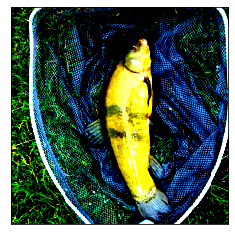

In [50]:
plt.figure()
plt.imshow(
    feature[0].transpose(0,2), interpolation='nearest'
    )
plt.xticks([])
plt.yticks([])
plt.savefig('clean_img.png', dpi=300)
plt.show()

# Gaussian noise images

In [51]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    AddGaussianNoise(std=1.50)
])

In [52]:
train_subset_indices = np.arange(4, 25)
train_ds = ImageNet(data_root, split='val', transform=transform)
train_subset = torch.utils.data.Subset(train_ds, train_subset_indices)

In [53]:
loader = torch.utils.data.DataLoader(train_subset, batch_size=1, drop_last=False)
load_iter = iter(loader)

In [54]:
feature, label = next(load_iter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


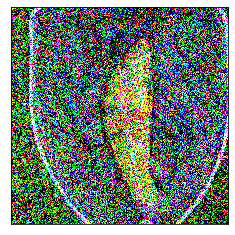

In [55]:
plt.figure()
plt.imshow(
    feature[0].transpose(0,2), interpolation='nearest'
    )
plt.xticks([])
plt.yticks([])
plt.savefig('noisy_img.png', dpi=300)
plt.show()

# Elastic Transform

In [56]:
import torchvision.transforms as T

In [57]:
noise_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.ElasticTransform(alpha=250., sigma=4.)
])

In [58]:
train_subset_indices = np.arange(4, 25)
train_ds = ImageNet(data_root, split='val', transform=noise_transform)
train_subset = torch.utils.data.Subset(train_ds, train_subset_indices)

In [59]:
loader = torch.utils.data.DataLoader(train_subset, batch_size=1, drop_last=False)
load_iter = iter(loader)

In [60]:
feature, label = next(load_iter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


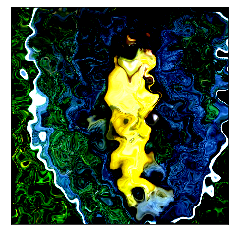

In [61]:
plt.figure()
plt.imshow(
    feature[0].transpose(0,2), interpolation='nearest'
    )
plt.xticks([])
plt.yticks([])
plt.savefig('elastic_img.png', dpi=300)
plt.show()

# Mag shuffle

In [66]:
noise_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    MagShuffle()
])

In [67]:
train_subset_indices = np.arange(4, 25)
train_ds = ImageNet(data_root, split='val', transform=noise_transform)
train_subset = torch.utils.data.Subset(train_ds, train_subset_indices)

In [68]:
loader = torch.utils.data.DataLoader(train_subset, batch_size=1, drop_last=False)
load_iter = iter(loader)

In [69]:
feature, label = next(load_iter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


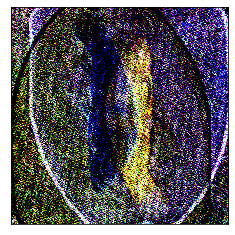

In [70]:
plt.figure()
plt.imshow(
    feature[0].transpose(0,2), interpolation='nearest'
    )
plt.xticks([])
plt.yticks([])
plt.savefig('magshuff_img.png', dpi=300)
plt.show()

# Phase shuffle

In [71]:
noise_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    PhaseShuffle()
])

In [72]:
train_subset_indices = np.arange(4, 25)
train_ds = ImageNet(data_root, split='val', transform=noise_transform)
train_subset = torch.utils.data.Subset(train_ds, train_subset_indices)

In [73]:
loader = torch.utils.data.DataLoader(train_subset, batch_size=1, drop_last=False)
load_iter = iter(loader)

In [74]:
feature, label = next(load_iter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


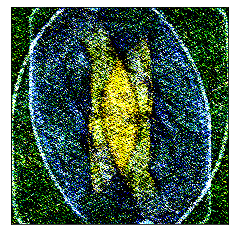

In [75]:
plt.figure()
plt.imshow(
    feature[0].transpose(0,2), interpolation='nearest'
    )
plt.xticks([])
plt.yticks([])
plt.savefig('phaseshuff_img.png', dpi=300)
plt.show()

# All shuffle

In [76]:
noise_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    AllShuffle()
])

In [77]:
train_subset_indices = np.arange(4, 25)
train_ds = ImageNet(data_root, split='val', transform=noise_transform)
train_subset = torch.utils.data.Subset(train_ds, train_subset_indices)

In [78]:
loader = torch.utils.data.DataLoader(train_subset, batch_size=1, drop_last=False)
load_iter = iter(loader)

In [79]:
feature, label = next(load_iter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


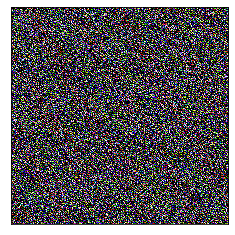

In [80]:
plt.figure()
plt.imshow(
    feature[0].transpose(0,2), interpolation='nearest'
    )
plt.xticks([])
plt.yticks([])
plt.savefig('allshuff_img.png', dpi=300)
plt.show()